In [11]:
# Install dependencies
!pip install -q scikit-learn pandas matplotlib torch




In [12]:
!pip install pandas scikit-learn torch h5py
!pip install -q scikit-learn pandas matplotlib torch


In [20]:
# Imports
import os
import torch

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


In [21]:
#constants/ Config
DATA_DIR = "/content/drive/MyDrive/data"
WINDOW_SIZES = [30, 90, 270]
MAX_PARAMS = 1000
BATCH_SIZE = 128
EPOCHS = 100
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.001

In [22]:

# Load Data
def load_all_data():
    data = []
    labels = []
    for folder in ["valve1", "valve2", "other"]:
        folder_path = os.path.join(DATA_DIR, folder)
        for file in os.listdir(folder_path):
            if file.endswith(".csv"):
                df = pd.read_csv(os.path.join(folder_path, file), sep=';')
                df.drop(columns=["datetime", "changepoint"], inplace=True, errors='ignore')
                data.append(df.drop("anomaly", axis=1).values)
                labels.append(df["anomaly"].values)
    return data, labels


In [23]:
# Preprocess windows
def create_windows(data, labels, window_size):
    X, y = [], []
    for seq, target in zip(data, labels):
        if len(seq) < window_size:
            continue
        for i in range(len(seq) - window_size):
            window = seq[i:i+window_size]
            label = target[i+window_size-1]
            X.append(window)
            y.append(label)
    return np.array(X), np.array(y)

In [24]:
# Build Model
def build_model(input_shape):
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv1D(4, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


Running for window size: 30


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 28, 4)          │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 14, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            57 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157 (628.00 B)

 Trainable params: 157 (628.00 B)

 Non-trainable params: 0 (0.00 B)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90       920
         1.0       0.87      0.69      0.77       469

    accuracy                           0.86      1389
   macro avg       0.86      0.82      0.83      1389
weighted avg       0.86      0.86      0.85      1389



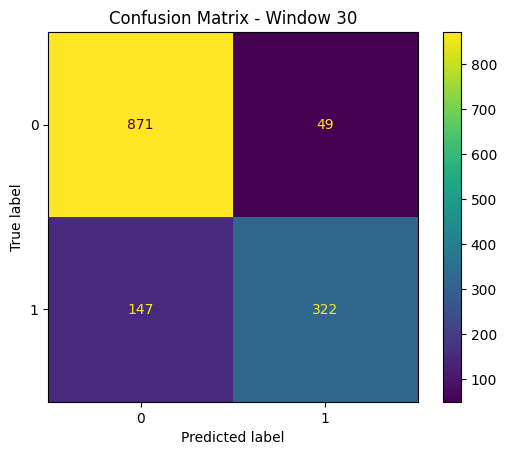


Running for window size: 90


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 88, 4)          │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 44, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 176)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           177 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277 (1.08 KB)

 Trainable params: 277 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90       814
         1.0       0.83      0.83      0.83       491

    accuracy                           0.88      1305
   macro avg       0.87      0.87      0.87      1305
weighted avg       0.88      0.88      0.88      1305



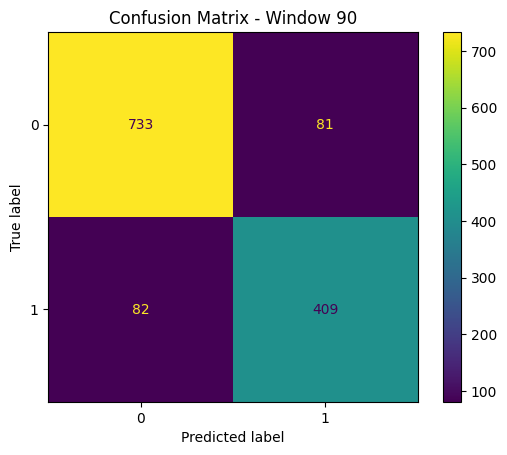


Running for window size: 270


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_11 (Conv1D)              │ (None, 268, 4)         │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 134, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 536)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 637 (2.49 KB)

 Trainable params: 637 (2.49 KB)

 Non-trainable params: 0 (0.00 B)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       587
         1.0       0.92      0.85      0.89       466

    accuracy                           0.90      1053
   macro avg       0.91      0.90      0.90      1053
weighted avg       0.90      0.90      0.90      1053



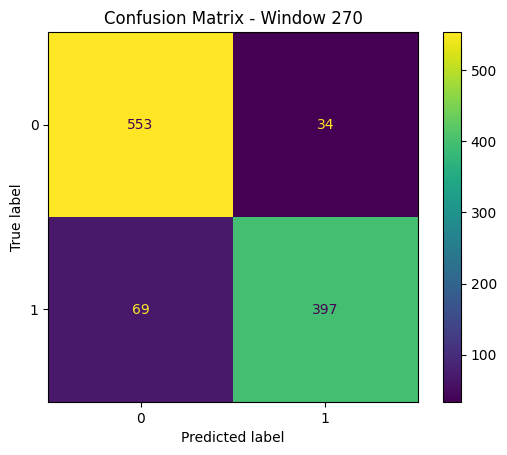

In [25]:

# Training + Evaluation
all_metrics = {}

raw_data, raw_labels = load_all_data()
for window_size in WINDOW_SIZES:
    print(f"\nRunning for window size: {window_size}")
    X, y = create_windows(raw_data, raw_labels, window_size)

    scaler = StandardScaler()
    nsamples, nsteps, nfeatures = X.shape
    X = scaler.fit_transform(X.reshape(-1, nfeatures)).reshape(nsamples, nsteps, nfeatures)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = build_model(X_train.shape[1:])
    model.summary()

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype(int)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix - Window {window_size}")
    plt.show()

    results_df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred.flatten()})
    results_df.to_csv(f"predictions_window_{window_size}.csv", index=False)

    all_metrics[window_size] = classification_report(y_test, y_pred, output_dict=True)

# Save all metrics to CSV
metrics_df = pd.DataFrame(all_metrics).T
metrics_df.to_csv("all_metrics_summary.csv")



In [29]:
model.save('model_window_{}.h5'.format(window_size))
